In [56]:
import torch
import math
import matplotlib.pyplot as plt

In [57]:
# Determine set size, list size, and domain
set_size = 3
list_size = 10000
domain = 10 # from negative to positive domain value

In [58]:
# Function for the neural network to learn 
def funcOutput(data):
  return data**2

In [59]:
# Generate inputs and ouputs
# Create a list of sets of N random numbers
inputs = 2*domain*torch.rand((list_size, set_size), dtype = torch.float32) - (domain)
# Determine output as function of input
outputs = funcOutput(inputs)

In [60]:
# Check inputs and outputs
print('A few inputs: \n {}'.format(inputs[:5]))
print('A few outputs: \n {}'.format(outputs[:5]))

A few inputs: 
 tensor([[-5.9749, -1.9968, -0.0935],
        [ 9.3142,  2.2072, -1.7530],
        [-4.9291,  3.0504,  7.3534],
        [-2.5503,  6.8518, -3.7885],
        [-1.1325, -4.8719,  7.1891]])
A few outputs: 
 tensor([[3.5700e+01, 3.9874e+00, 8.7469e-03],
        [8.6754e+01, 4.8719e+00, 3.0731e+00],
        [2.4296e+01, 9.3049e+00, 5.4073e+01],
        [6.5043e+00, 4.6947e+01, 1.4353e+01],
        [1.2826e+00, 2.3735e+01, 5.1683e+01]])


In [61]:
# Create a single-layer neural network
hidden_nodes = 5000
model = torch.nn.Sequential(
    torch.nn.Linear(inputs.shape[1],hidden_nodes),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_nodes,outputs.shape[1])
)

In [64]:
# Get ready to train
model.train()

# Break the list up into smaller batches for more efficient training
numMiniBatch = int(math.floor(inputs.shape[0]/100))
inputMiniBatches = inputs.chunk(numMiniBatch)
outputMiniBatches = outputs.chunk(numMiniBatch)

# Train the neural network
lossFunc = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

n_epochs = 500

print("Training", "\n", "_"*int(n_epochs/10), sep = '')
for epoch in range(n_epochs):
  # Print something every 10 epochs of training
  if epoch%10 == 0:
    print('*', end = '')
  for minibatch in range(numMiniBatch):
    prediction = model(inputMiniBatches[minibatch])
    loss = lossFunc(prediction,outputMiniBatches[minibatch])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


print ('\nTraining done!')

Training
__________________________________________________
**************************************************
Training done!


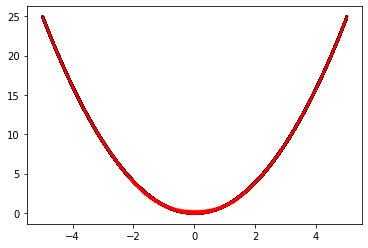

In [65]:
# Check out the output by running the model in evaluation
with torch.no_grad():
  model.eval()
  test = domain*torch.rand((list_size, set_size), dtype = torch.float32) - (domain/2)
  desired_output = funcOutput(test)
  prediction = model(test)

# Poltting predicted output versus desired output
plt.scatter(test, desired_output, c = 'black', s = 4, alpha = 0.2)
plt.scatter(test, prediction, c = 'red', s = 0.25, alpha = 0.2)